In [3]:
# **Phishing Domain Detection (Data Visualization)**

### The objective of this notebook is to provide relevant data visualizations of the features extracted in the previous notebook

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [17]:
urldata = pd.read_csv("./Url_Processed.csv")
urldata.drop("Unnamed: 0",axis=1,inplace=True)
urldata.head(5)

,url,label,result,url_length,hostname_length,path_length,fd_length,use_of_ip,short_url,count-,...,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,https://www.google.com,benign,0,22,14,0,0,1,1,0,...,0,0,2,0,1,1,1,0,17,0
1,https://www.youtube.com,benign,0,23,15,0,0,1,1,0,...,0,0,2,0,1,1,1,0,18,0
2,https://www.facebook.com,benign,0,24,16,0,0,1,1,0,...,0,0,2,0,1,1,1,0,19,0
3,https://www.baidu.com,benign,0,21,13,0,0,1,1,0,...,0,0,2,0,1,1,1,0,16,0
4,https://www.wikipedia.org,benign,0,25,17,0,0,1,1,0,...,0,0,2,0,1,1,1,0,20,0


benign       345738
malicious    104438
Name: label, dtype: int64


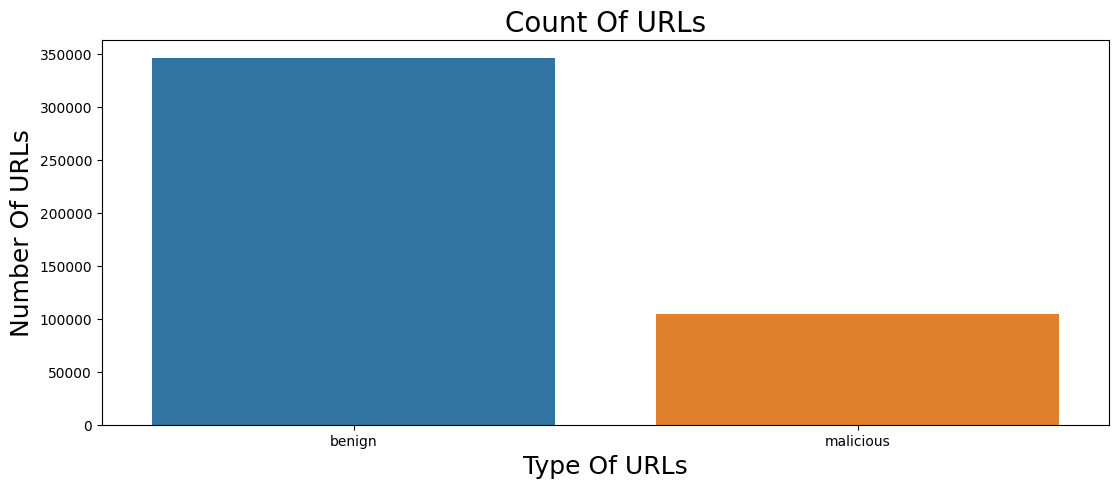

In [8]:
i = urldata["label"].value_counts()
print(i)

plt.figure(figsize=(13,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
plt.show()

C:\Users\AT\AppData\Local\Temp\ipykernel_20084\3571271951.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = urldata.corr()


<Axes: >

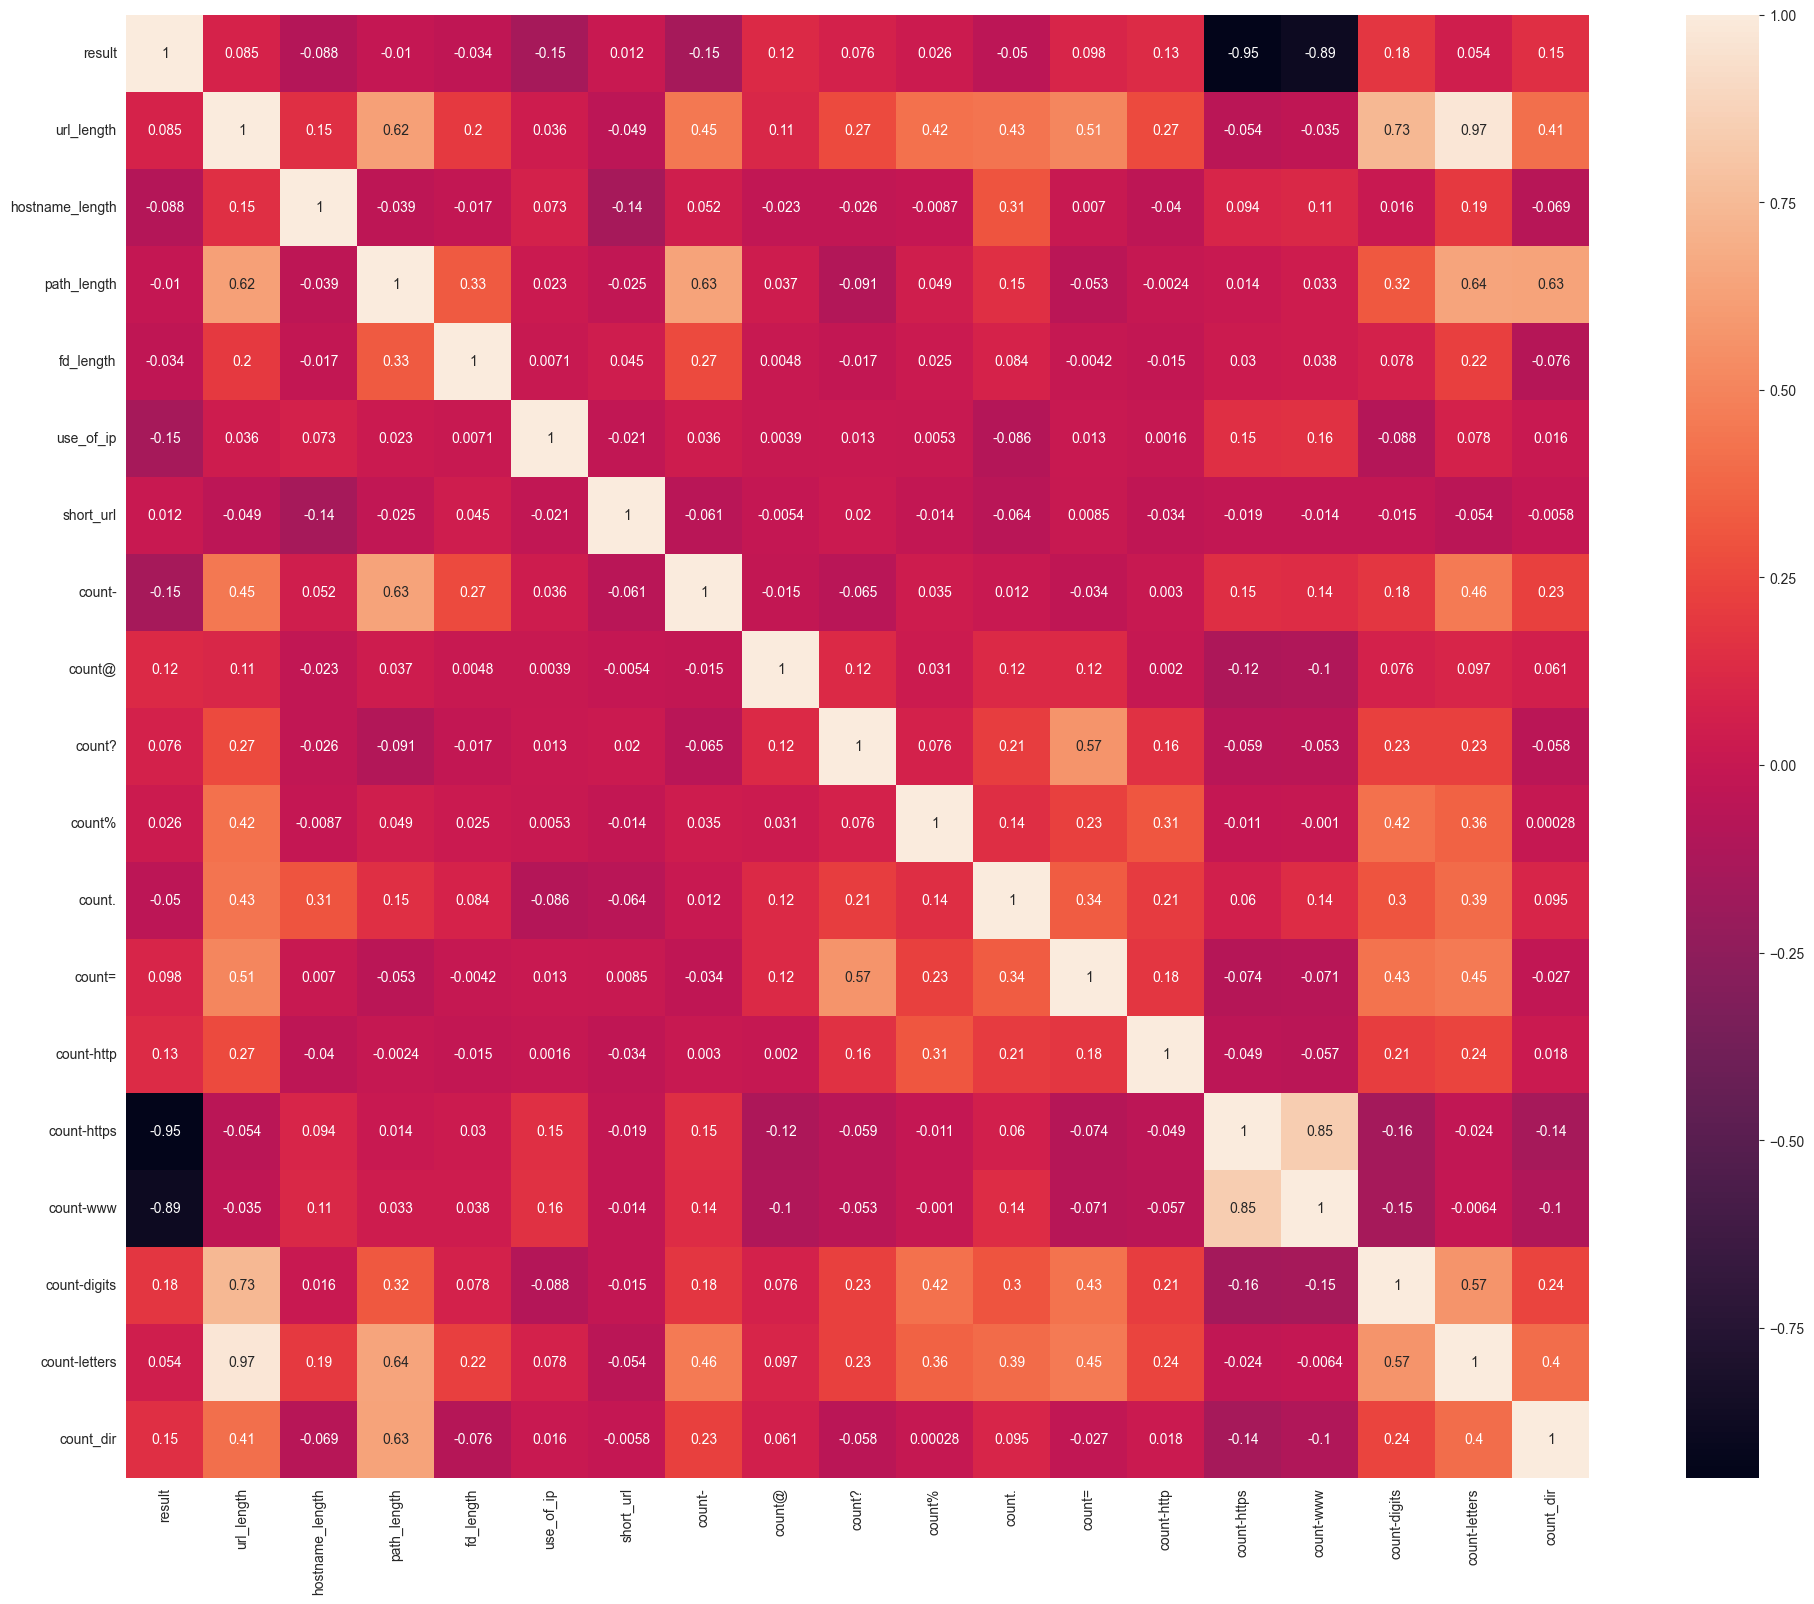

In [18]:
# Correlation Heatmap
corrmat = urldata.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

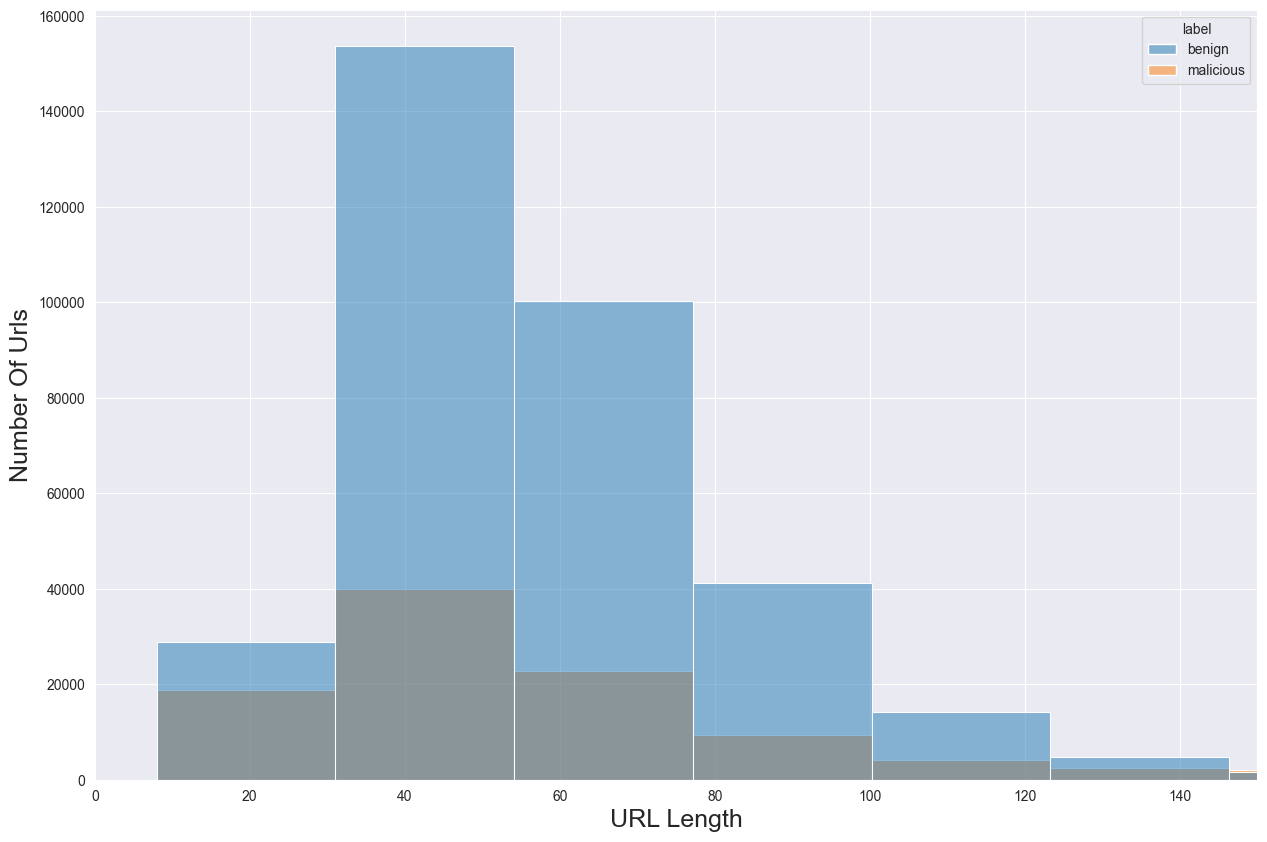

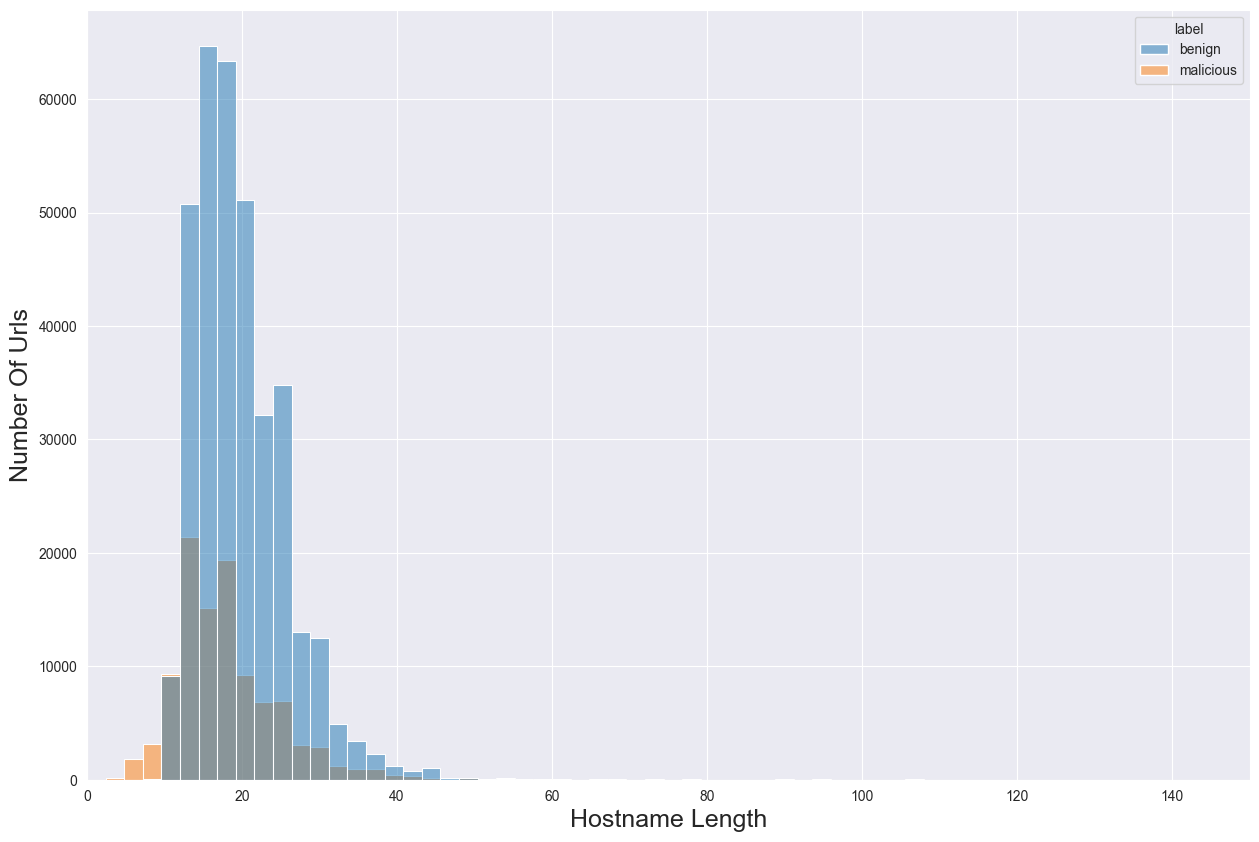

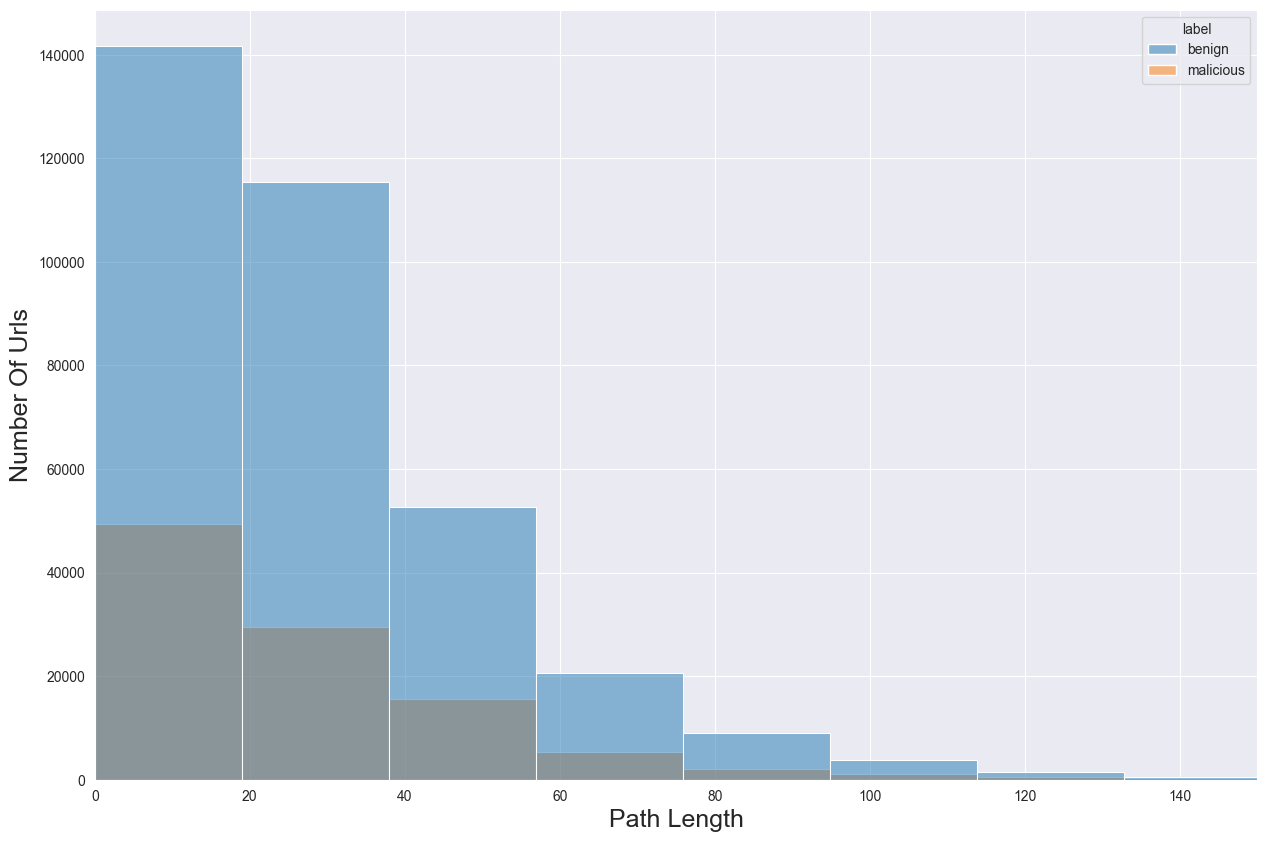

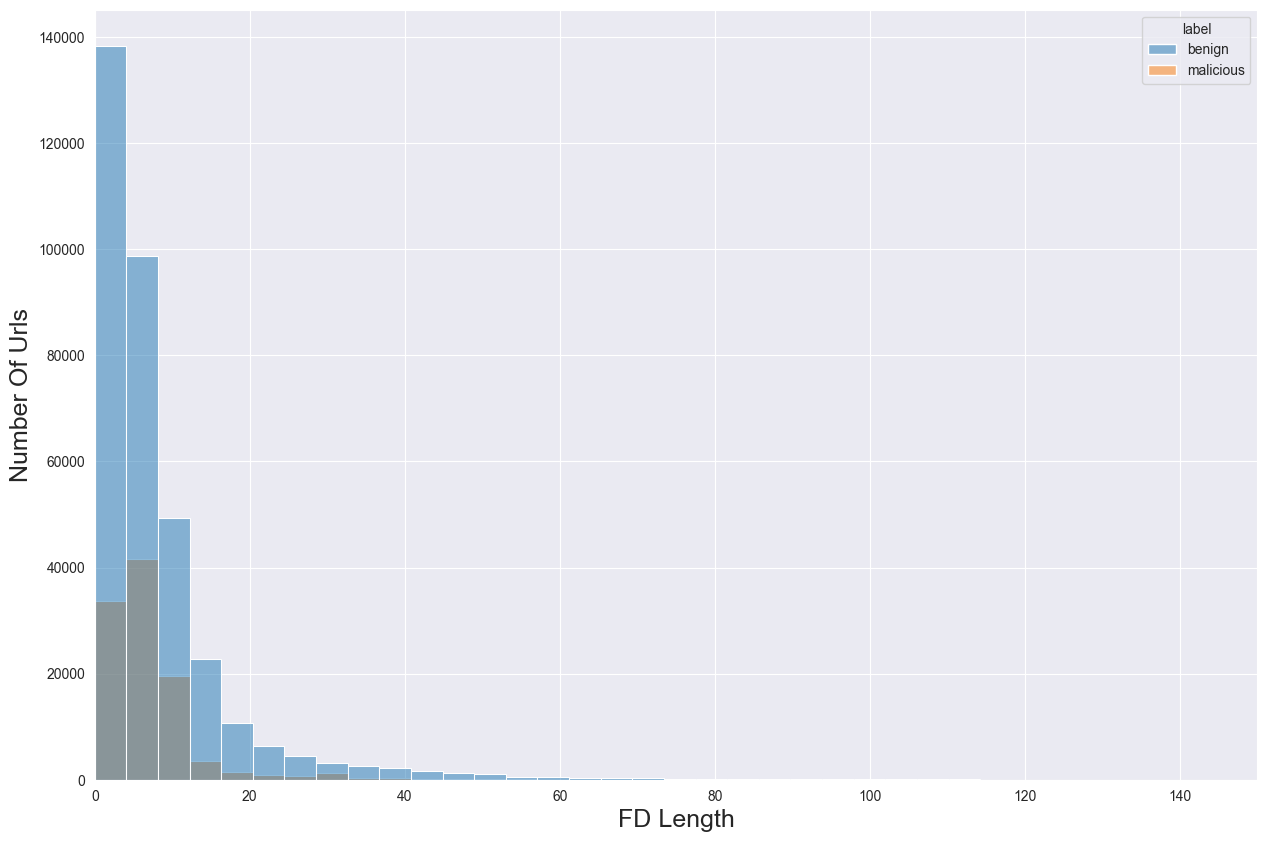

In [19]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,10

# plotting distrubutions
features = list(urldata.columns) 
features.remove("url")
features.remove("result")

hist_features = ["url_length","hostname_length","path_length","fd_length"]
value_names = ["URL Length", "Hostname Length", "Path Length", "FD Length"]

for idx, i in enumerate(hist_features):
   sns.histplot(data=urldata,x=i,bins=100,hue='label')
   plt.xlabel(value_names[idx],fontsize=18)
   plt.ylabel("Number Of Urls",fontsize=18)
   plt.xlim(0,150)
   plt.show()

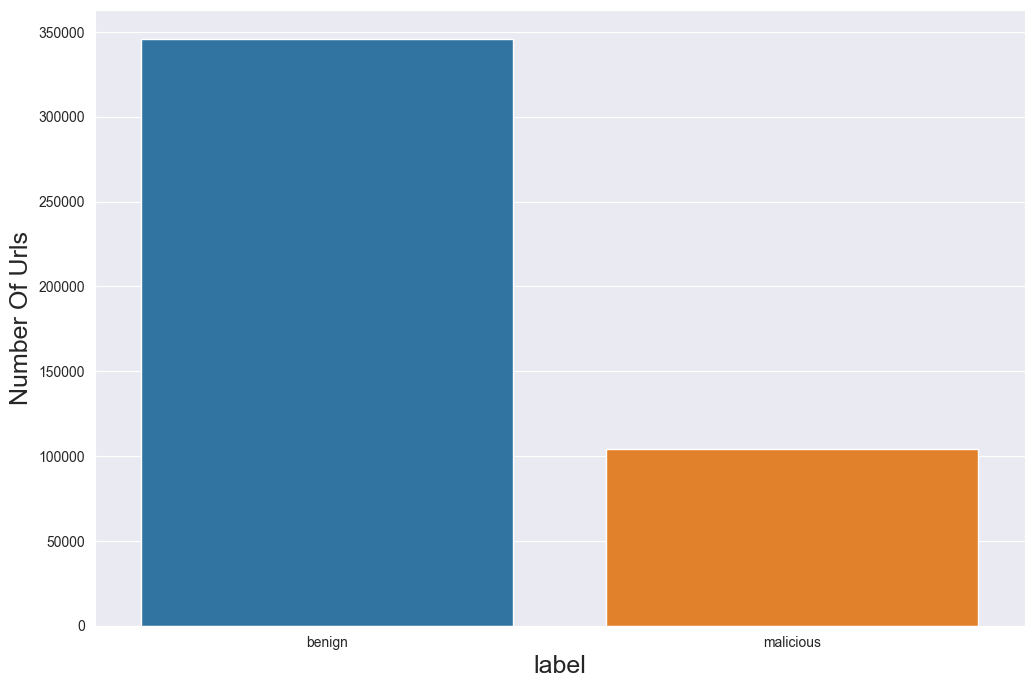

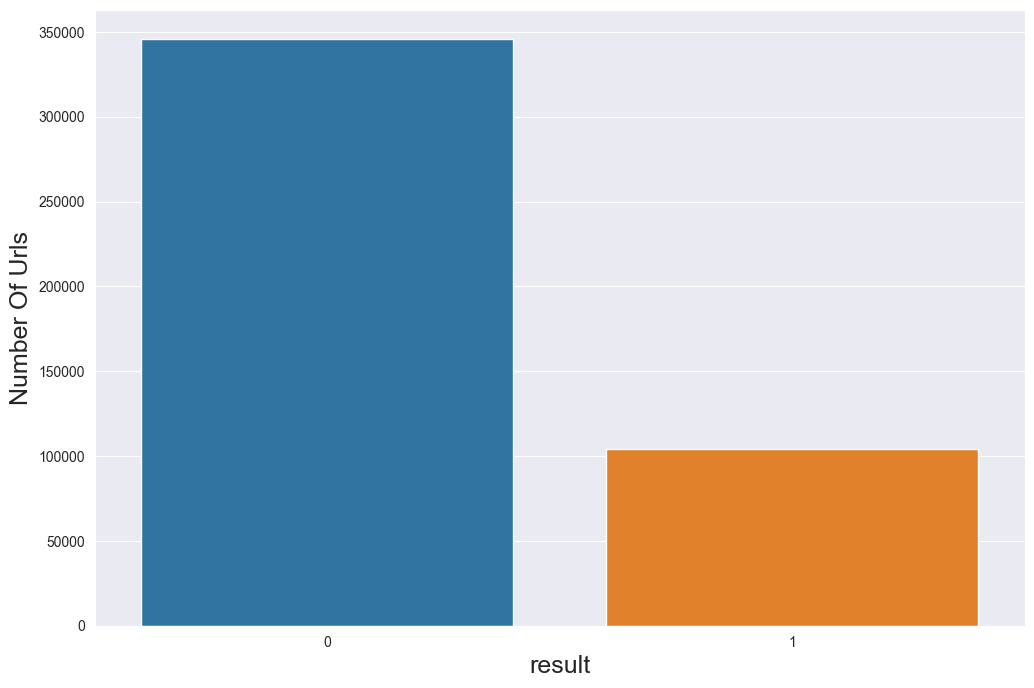

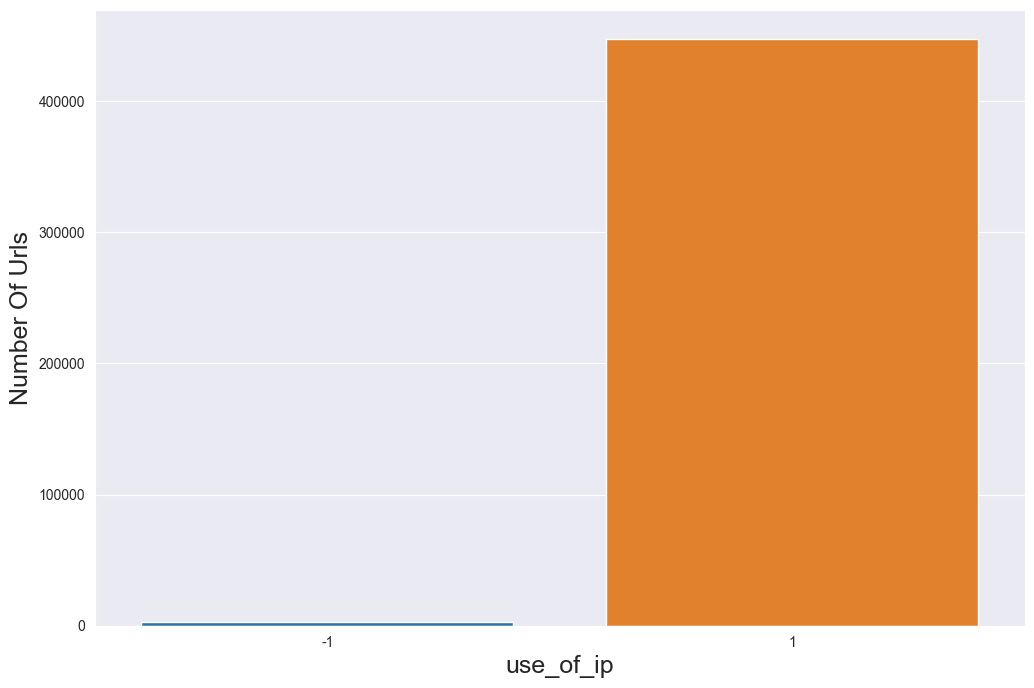

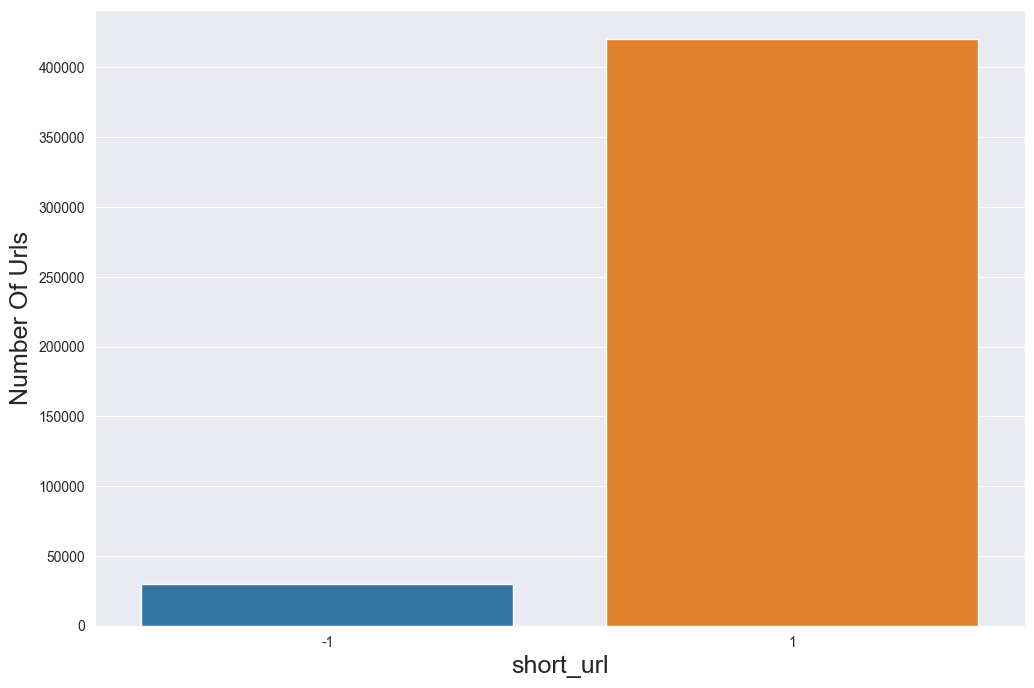

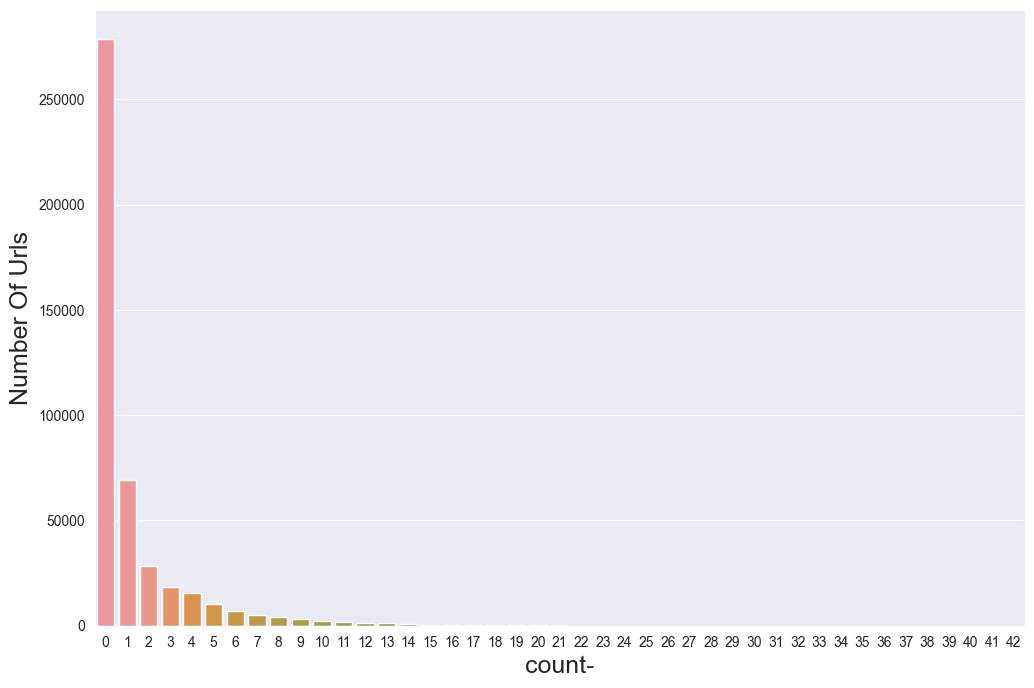

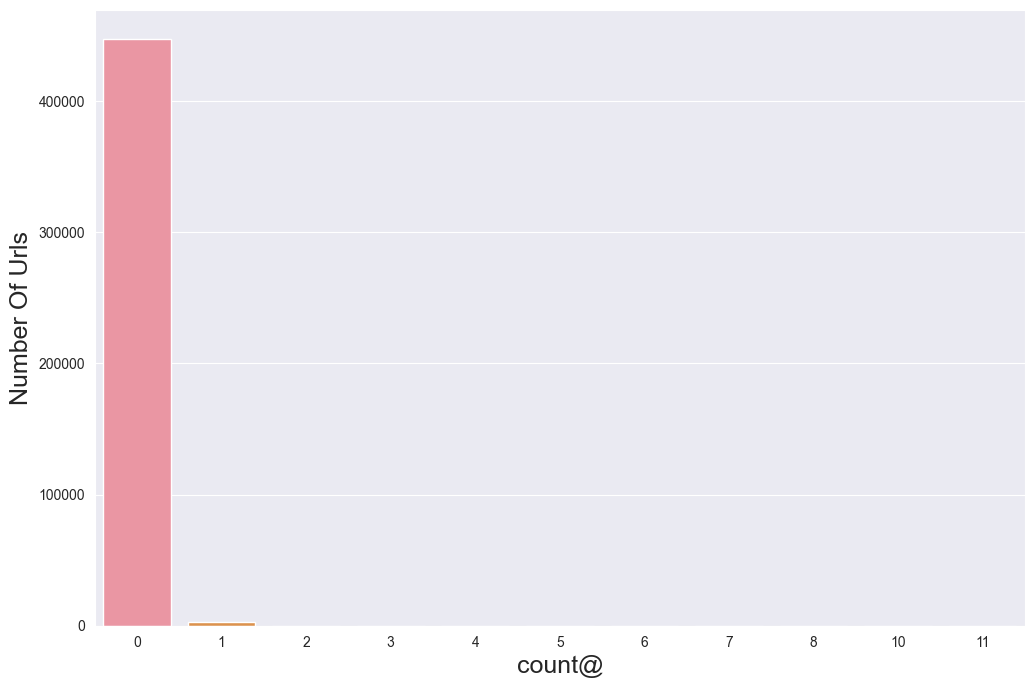

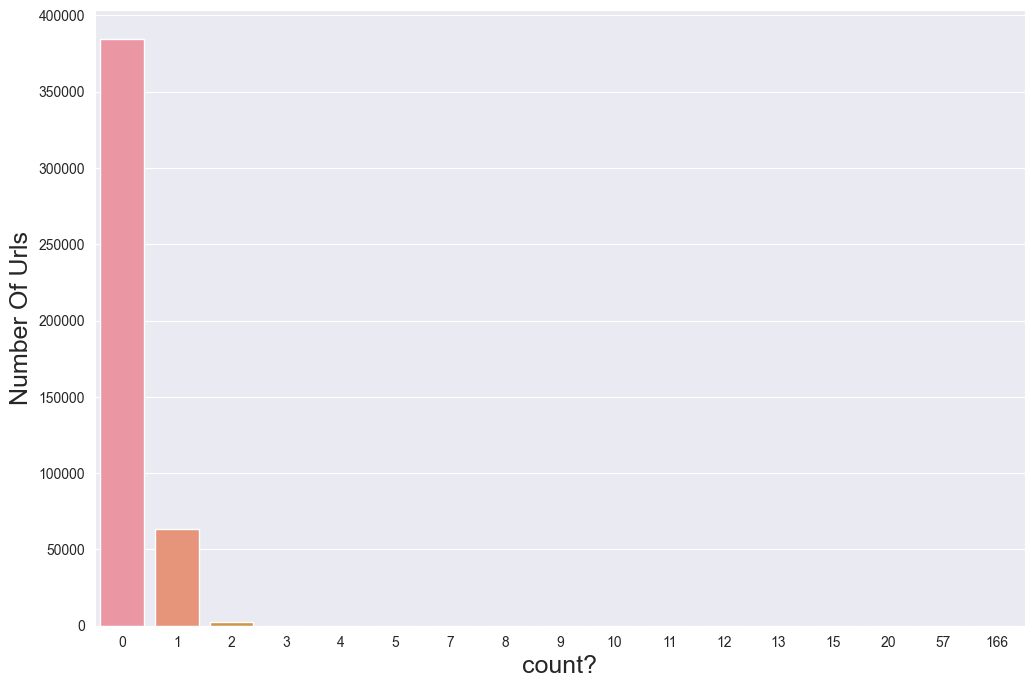

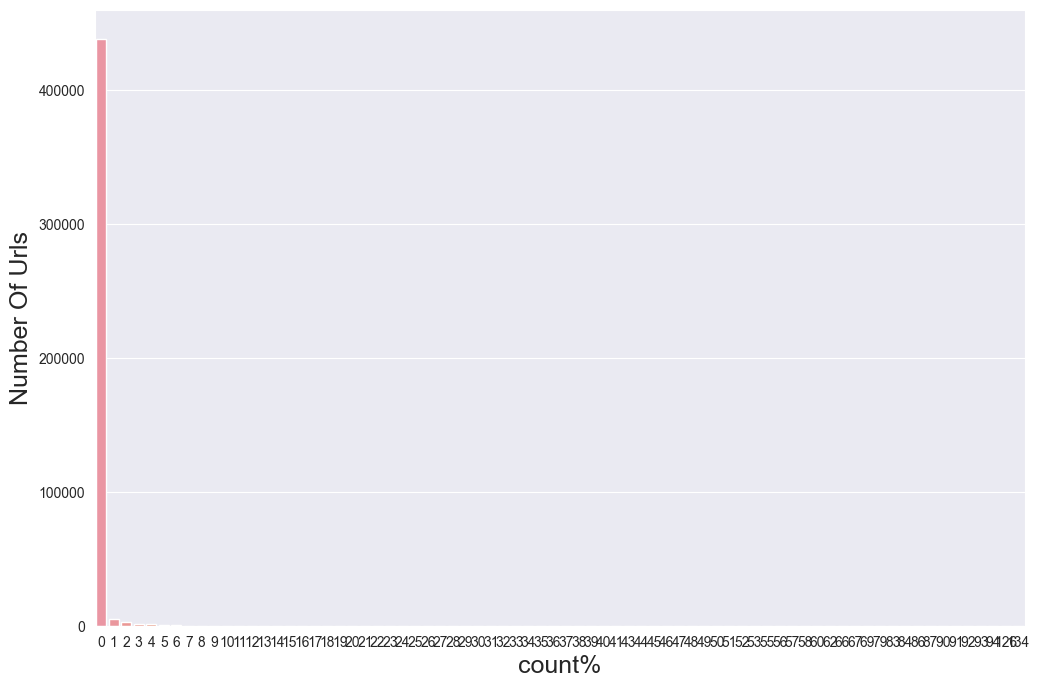

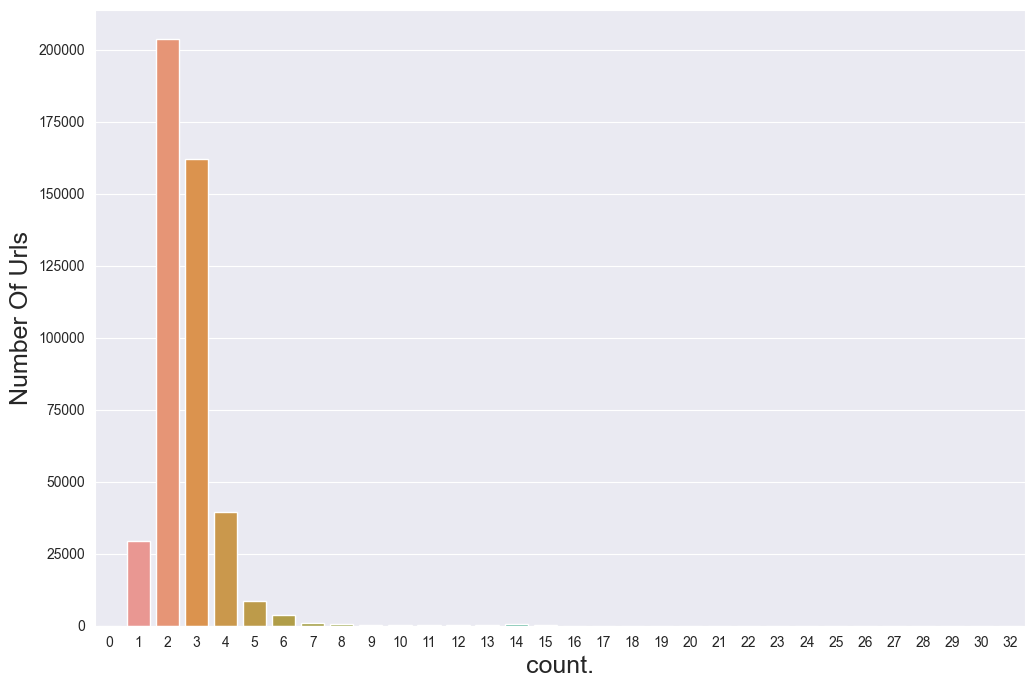

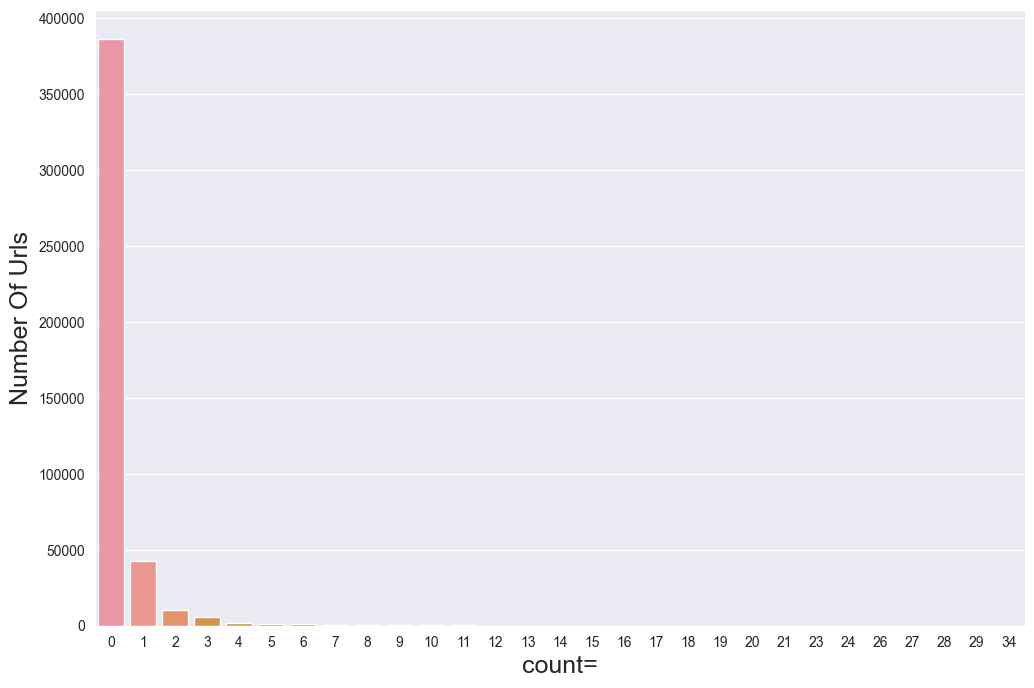

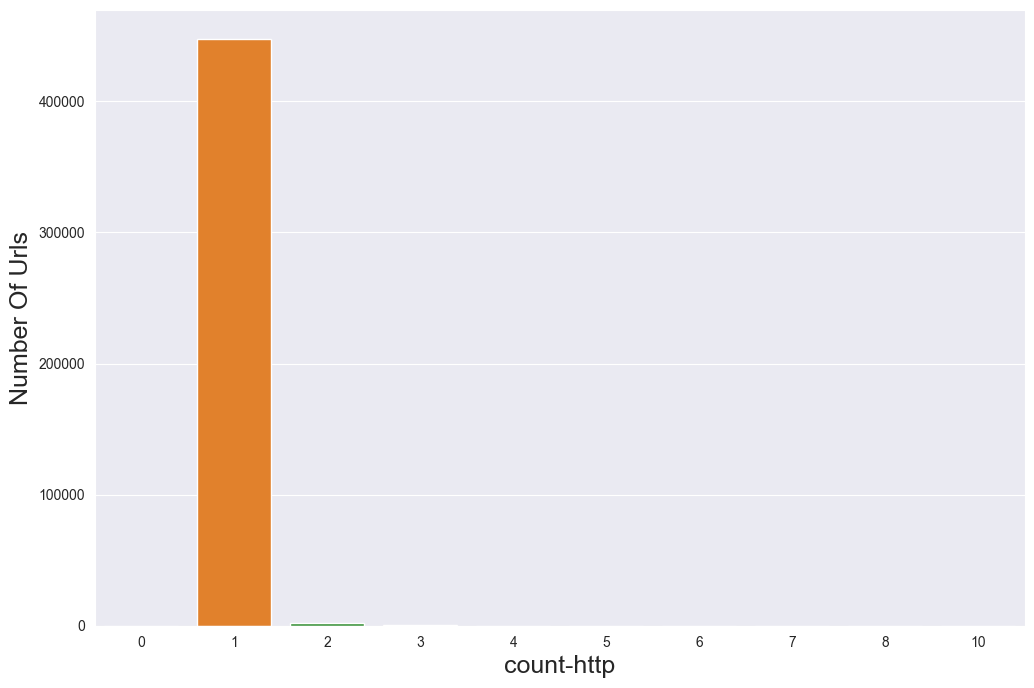

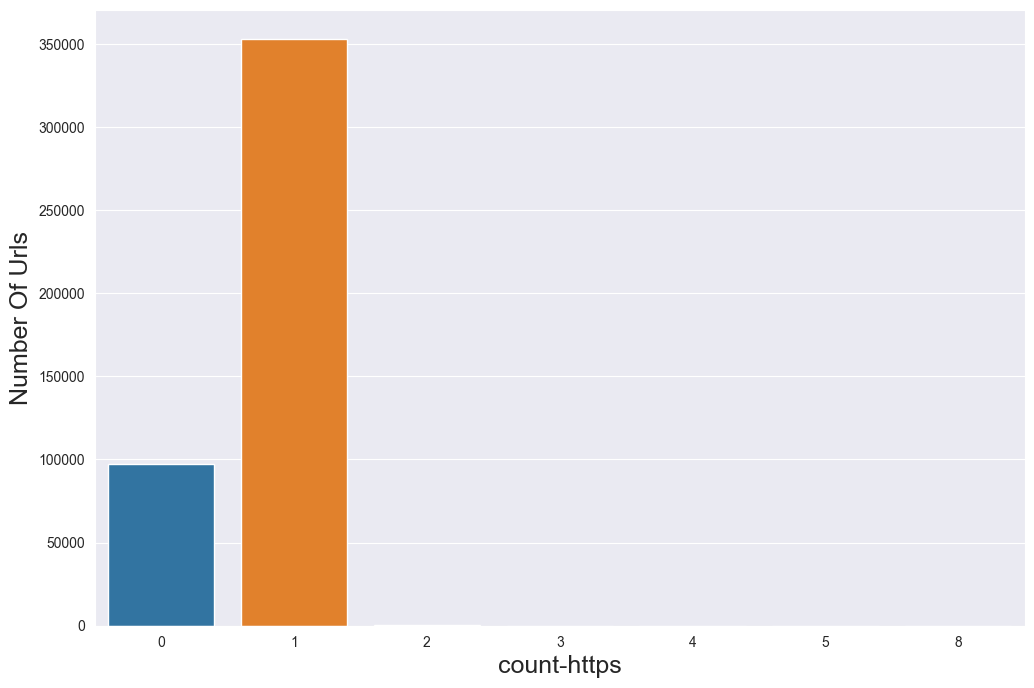

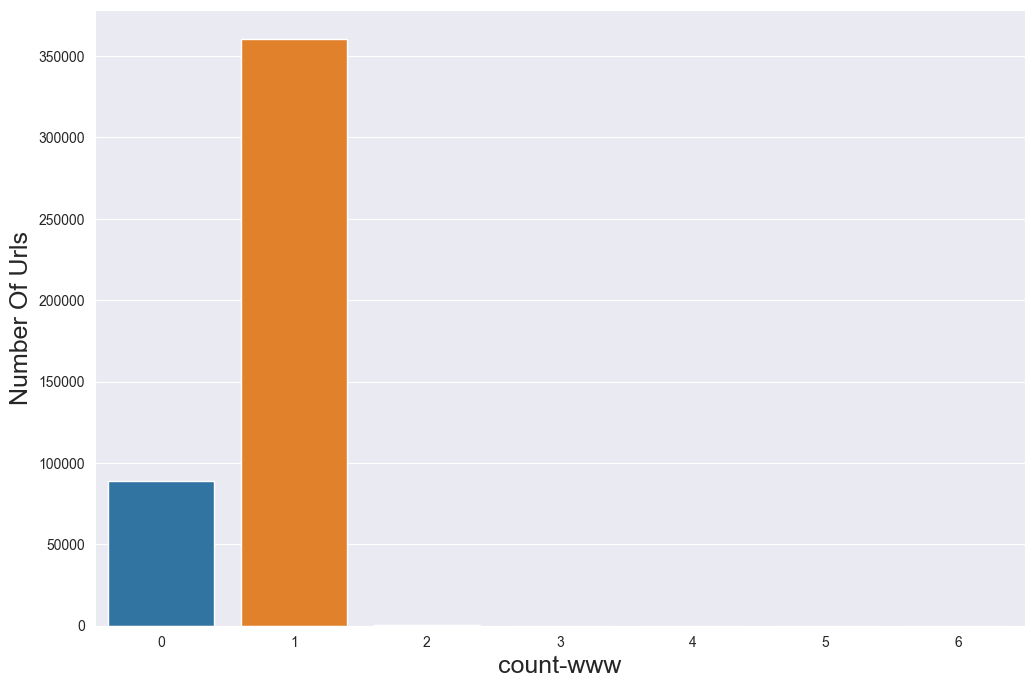

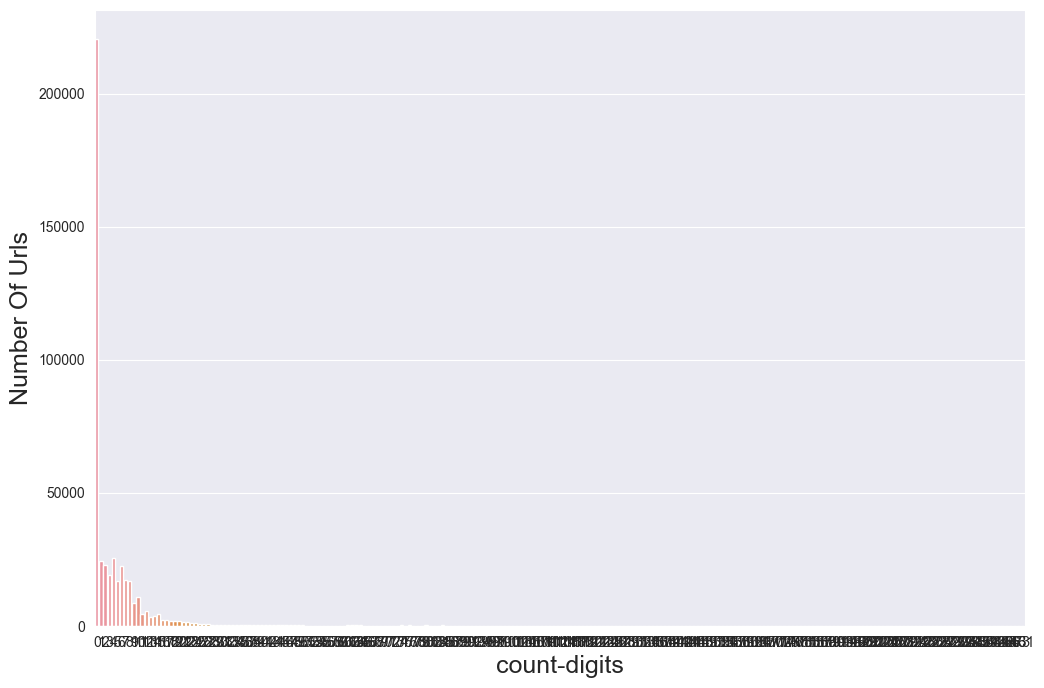

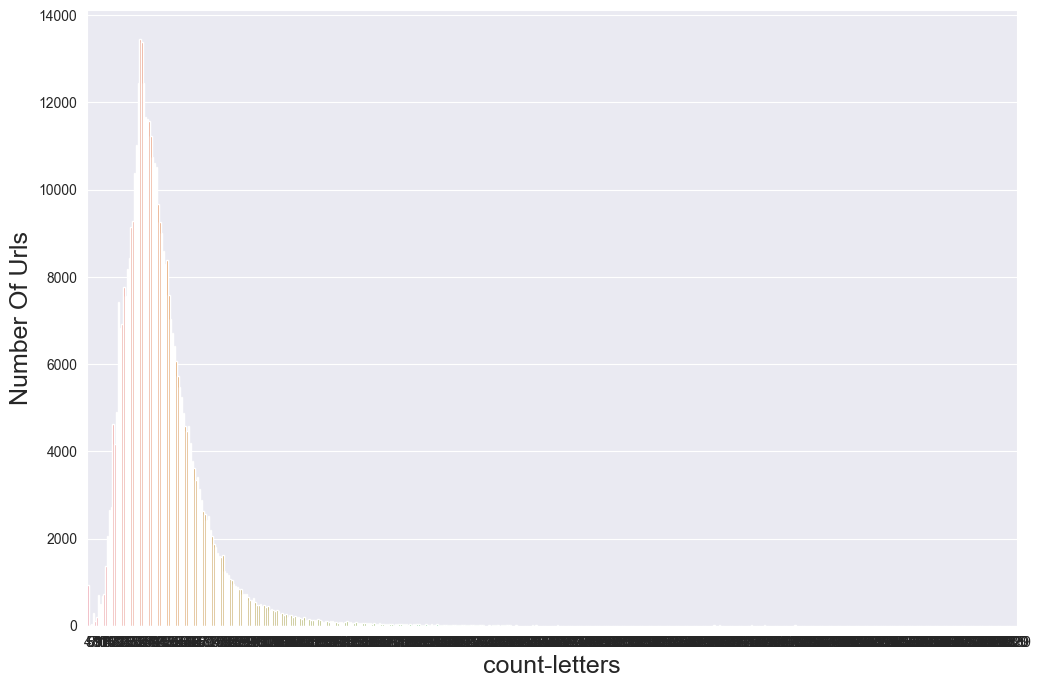

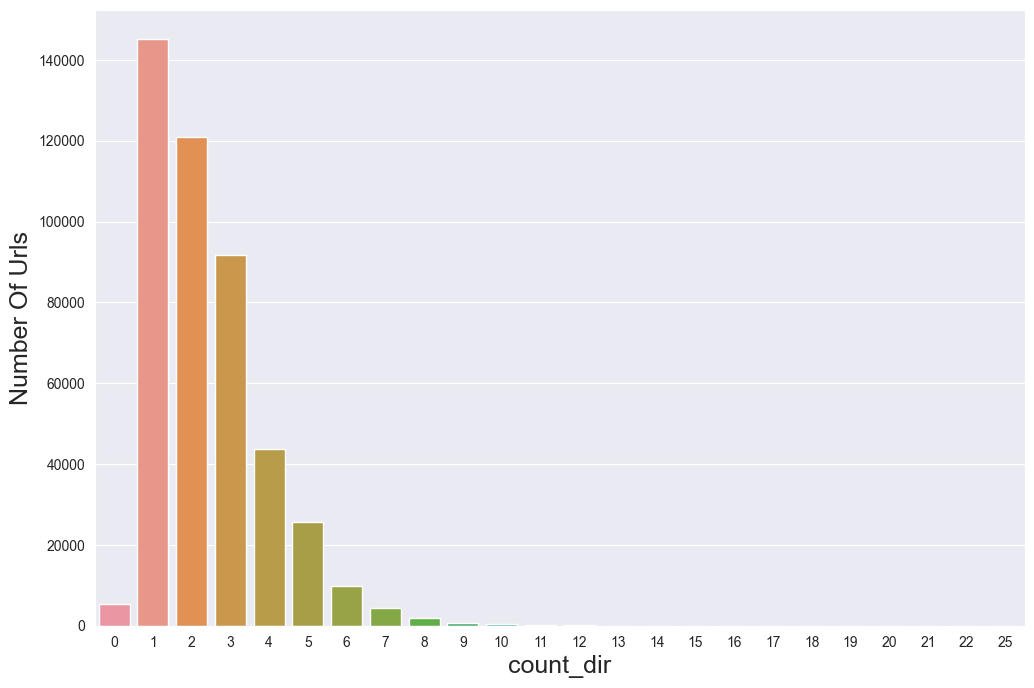

In [20]:
features = list(urldata.columns) # list of feature names
features.remove("url")

rcParams['figure.figsize'] = 12,8

for i in features:
   
   if i in hist_features:
     continue
   
   sns.countplot(x=i,data=urldata)
   plt.xlabel(i,fontsize=18)
   plt.ylabel("Number Of Urls",fontsize=18)
   plt.show()